# MS5114 Assignment 1

In this assignment, you are required to analyze data from Yahoo Finance website using three Python libraries (i.e. `yfinance`, `tensorflow` and `transformers`). Make sure that the required libraries are installed in your Python distribution (use Anaconda Navigator or `pip` command for this purpose). You are to expected have knowledge of following topics to solve the problems.

* data types, operators, conditions, functions
* lists, dictionaries, tuples, data frames
* strings

For details of relevant libraries visit following 

* https://aroussi.com/post/python-yahoo-finance
* https://huggingface.co/blog/sentiment-analysis-python

### Name: _Snigdha Chaudhuri_
### Student Id: _23102262_

In [68]:
# import required libraries
import yfinance as yf
from transformers import pipeline
import matplotlib.pyplot as plt

## Problem 1

Write a function `calc_returns(prices)`. This function will process a list of stock prices and calculate the periodic returns. The function should assume that the oldest price is in `prices[0]` and latest price in `prices[-1]`. The function should use a loop to accumulate a list of returns for periods 1 to n. The periodic rate of return is calculated as the rate of change in price from the previous period, i.e.,

$r_i = \frac{p_i}{p_{i - 1}} - 1$

For example:

```
>>> prices = [100,110,105,112,115]
>>> returns = calc_returns(prices)
>>> print(returns)`
[0.10000000000000009, -0.045454545454545414, 0.06666666666666665, 0.02678571428571419]
```

_Notes_:

* For $n$ stock prices, you will generate a list of $n-1$ periodic returns. There is no return for period $0$.
* The function `calc_prices` should not print any output, but rather creates and returns a list of periodic rates of return.
* When computing with binary floating point numbers, there is a small representational error which might result in an unexpected value in the insignificant digits (e.g., (110 - 100) / 100 gave a result of 0.10000000000000009.) Do not be alarmed by this small error!
* The values in the list of returns will be unformatted floating-point numbers; you can use the `round()` function to round up to 2 decimal points.

In [75]:
# Create a Ticker object for the stock with symbol "C" (Citigroup)
citi = yf.Ticker("C")

# Use the Ticker object to fetch historical stock prices for the past 3 months
prices = citi.history("3mo")

Analyze stock prices and returns for a specific period e.g. 1 week or 2 weeks. 

* Using `yfinance` library, load the data about a company's share prices using their stock ticker e.g. "MSFT" for Microsoft.
* Extract the list of closing prices for each day.
* Use the `calc_returns()` function to calculate the list to returns.
* Print both stock prices and returns.
* Explain the trend in stock prices and returns.

_Note: Avoid using ticker for popular companies so that there is no overlap of tickers between students. Look your Yahoo Finance website to find a different company and its ticker_

Stock Prices: [41.642547607421875, 41.56330490112305, 41.42462921142578, 41.1076545715332, 41.68217086791992, 42.29631042480469, 43.940616607666016, 44.4556999206543, 44.2476806640625, 44.93115997314453, 44.83210372924805, 44.66371154785156, 44.59437561035156, 44.802391052246094, 44.65380859375, 44.43588638305664, 45.317474365234375, 45.664161682128906, 46.78348159790039, 46.922157287597656, 46.25849151611328, 47.40752410888672, 48.041473388671875, 48.42778778076172, 47.694786071777344, 47.60563659667969, 48.87353515625, 49.7650260925293, 49.35890197753906, 49.19050598144531, 50.44850158691406, 49.59663009643555, 50.121620178222656, 50.3791618347168, 50.8546257019043, 50.973487854003906, 51.03292465209961, 50.953678131103516, 52.53855514526367, 53.13288116455078, 53.26165008544922, 53.81636047363281, 53.49938201904297, 52.97439193725586, 52.518741607666016, 51.58763122558594, 52.12252426147461, 51.37961196899414, 50.87443542480469, 50.626800537109375, 51.03292465209961, 52.340442657470

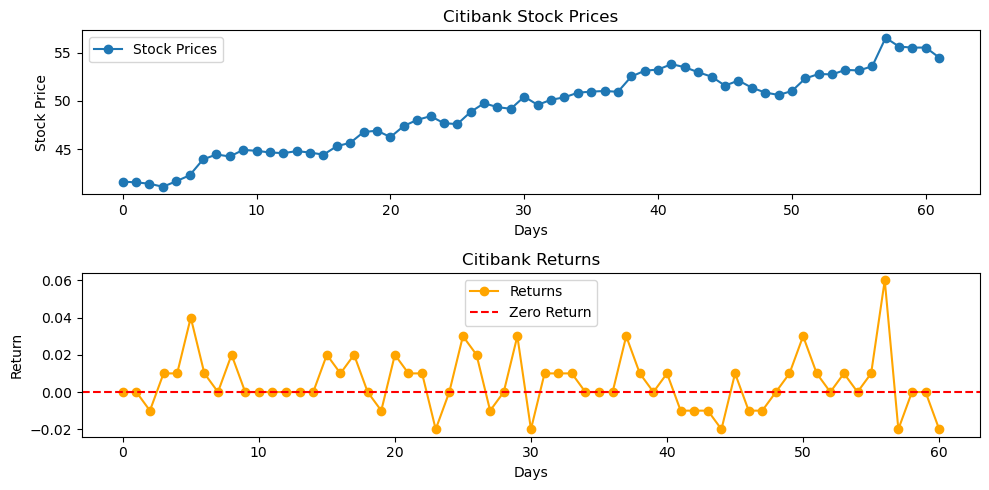

In [64]:
# Define a function named calc_returns that takes a list of prices as input
def calc_returns(prices):

    # Calculate the returns for each price by using the fomula provided
    returns = [(prices[i] / prices[i-1]) - 1 for i in range(1, len(prices))]

    # Round each calculated return to two decimal places
    return [round(r, 2) for r in returns]

#Calculating the closing price for stocks each day
closing_prices = prices["Close"].tolist()
# Calculate the returns using the previously defined calc_returns function on the closing prices
returns = calc_returns(closing_prices)

#Printing the stock prices and their returns
print("Stock Prices:", closing_prices,"\n")
print("Returns:", returns)

# Plotting stock prices
plt.figure(figsize=(10, 5))  # Creating a new figure with specified size
plt.subplot(2, 1, 1)  # Creating the first subplot in a 2-row, 1-column grid
plt.plot(closing_prices, label='Stock Prices', marker='o')  # Plotting stock prices with labels and markers
plt.title('Citibank Stock Prices')  # Setting the title for the subplot
plt.xlabel('Days')  # Setting the x-axis label
plt.ylabel('Stock Price')  # Setting the y-axis label
plt.legend()  # Displaying the legend

# Plotting returns
plt.subplot(2, 1, 2)  # Creating the second subplot in a 2-row, 1-column grid
plt.plot(returns, label='Returns', marker='o', color='orange')  # Plotting returns with labels, markers, and color
plt.title('Citibank Returns')  # Setting the title for the subplot
plt.xlabel('Days')  # Setting the x-axis label
plt.ylabel('Return')  # Setting the y-axis label
plt.axhline(y=0, color='r', linestyle='--', label='Zero Return')  # Adding a horizontal line at zero with label
plt.legend()  # Displaying the legend

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


_ 
 # **Stock Prices Analysis**
 
 **Market Movements:**

 The stock prices for Citigroup Inc. represent the closing values over the last three months.
 They've shown a mix of ups and downs, creating a dynamic pattern.

**Fluctuations and Trends:**

 The prices have been fluctuating, showcasing various upward and downward movements.
 Notably, there are periods of price increases, for instance, from $39.09 to $44.36, and periods of decreases, like from $44.88 to $44.07.

 # **Returns Analysis**
 
 **Performance Insights:**

 Calculated returns offer insights into how much the stock's value has changed from one period to the next.
 The returns fluctuate, pointing to both positive and negative performance.
 
 **Positive and Negative Returns:**

 Positive returns indicate the stock's value went up from the previous period.
 Conversely, negative returns suggest a decrease in value.
 These fluctuations are relatively small, implying a moderate level of volatility.

 # **Overall Trend Analysis**
 
 **Mixed Market Conditions:**

 The stock prices and returns collectively paint a picture of a market with moderate volatility.
 Both upward and downward movements have been observed, indicating a dynamic period.

## Problem 2
Write a function `calc_simple_moving_average(prices, window_size)`. This function will process a list of stock prices and calculate the simple moving average based on a specified window size. The function should assume that the oldest price is in `prices[0]` and latest price in `prices[-1]`. The function should use a loop to calculate a list of moving averages for periods $1$ to $n$. The simple moving average is calculate within a specific window $k$ and shifting throught the list of prices , i.e.,

$a_i = \frac{1}{k} \sum_{i}^{i+k} p_i$

For example:

```
>>> prices = [100,110,105,112,115]
>>> averages = calc_simple_moving_average(prices, 3)
>>> print(averages)`
[105, 109, 110.666666667]
```

_Notes_:

* For $n$ stock prices, you will generate a list of $n-k+1$ averages. There is no average for first $k-1$ prices.
* The function `calc_simple_moving_average` should not print any output, but rather creates and returns a list of averages.
* The values in the list of returns will be unformatted floating-point numbers; you can use the `round()` function to round up to 2 decimal points.


Analyze stock prices and averages for a specific period e.g. 1 month or 2 months. 

* Using `yfinance` library, load the data about a company's share prices using their stock ticker e.g. "MSFT" for Microsoft.
* Extract the list of closing prices for each day.
* Use the `calc_simple_moving_average()` function to calculate the simple moving average.
* Print both stock prices and averages.
* Explain the trend in stock prices and averages.

_Note: You can use the same ticker here as for the previous problem_

Stock Prices: [41.642547607421875, 41.56330490112305, 41.42462921142578, 41.1076545715332, 41.68217086791992, 42.29631042480469, 43.940616607666016, 44.4556999206543, 44.2476806640625, 44.93115997314453, 44.83210372924805, 44.66371154785156, 44.59437561035156, 44.802391052246094, 44.65380859375, 44.43588638305664, 45.317474365234375, 45.664161682128906, 46.78348159790039, 46.922157287597656, 46.25849151611328, 47.40752410888672, 48.041473388671875, 48.42778778076172, 47.694786071777344, 47.60563659667969, 48.87353515625, 49.7650260925293, 49.35890197753906, 49.19050598144531, 50.44850158691406, 49.59663009643555, 50.121620178222656, 50.3791618347168, 50.8546257019043, 50.973487854003906, 51.03292465209961, 50.953678131103516, 52.53855514526367, 53.13288116455078, 53.26165008544922, 53.81636047363281, 53.49938201904297, 52.97439193725586, 52.518741607666016, 51.58763122558594, 52.12252426147461, 51.37961196899414, 50.87443542480469, 50.626800537109375, 51.03292465209961, 52.340442657470

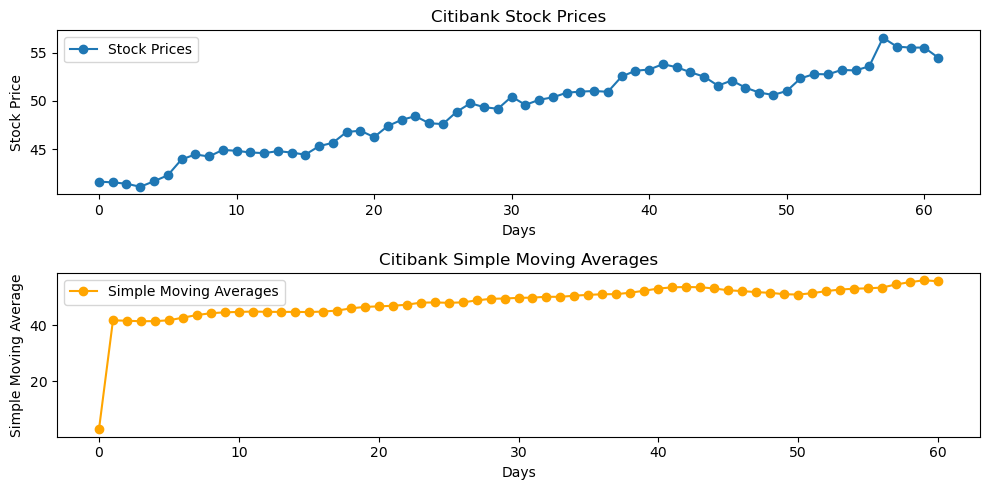

In [65]:
# Fetch historical stock prices for the last 3 months and extract the closing prices
closing_prices = citi.history("3mo")["Close"].tolist()

# Define the calc_simple_moving_average function that calculates the simple moving average
def calc_simple_moving_average(price_2, window_size):
    averages = []

    # Calculate the simple moving average for each window
    for i in range(len(price_2) - window_size + 1):
        # Extract the window of prices for the current iteration
        window = price_2[i:i + window_size]

        # Calculate the simple moving average for the current window
        average = sum(window) / window_size

        # Round the calculated average to two decimal places and append to the list
        averages.append(round(average, 2))

    # Return the list of calculated simple moving averages
    return averages

window_size = 3

# Calculate the simple moving averages with a window size of 3
av = calc_simple_moving_average(closing_prices, window_size)

# Print both stock prices and averages
print("Stock Prices:", closing_prices,"\n")
print("Simple Moving Averages:", av)

# Plotting stock prices and simple moving averages
plt.figure(figsize=(10, 5))  # Create a new figure with a specified size

# Plotting stock prices
plt.subplot(2, 1, 1)  # Create the first subplot in a 2-row, 1-column grid
plt.plot(closing_prices, label='Stock Prices', marker='o')  # Plot stock prices with labels and markers
plt.title('Citibank Stock Prices')  # Set the title for the subplot
plt.xlabel('Days')  # Set the x-axis label
plt.ylabel('Stock Price')  # Set the y-axis label
plt.legend()  # Display the legend

# Plotting simple moving averages
plt.subplot(2, 1, 2)  # Create the second subplot in a 2-row, 1-column grid
plt.plot(averages, label='Simple Moving Averages', marker='o', color='orange')  # Plot simple moving averages with labels, markers, and color
plt.title('Citibank Simple Moving Averages')  # Set the title for the subplot
plt.xlabel('Days')  # Set the x-axis label
plt.ylabel('Simple Moving Average')  # Set the y-axis label
plt.legend()  # Display the legend

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()



# Stock Prices:
The historical stock prices for Citibank over the last 3 months show some fluctuations.
The closing prices range from a low of $41.11 to a high of $56.55.

# Simple Moving Averages (SMA):

The simple moving averages (SMA) are calculated with a window size of 3.
SMAs provide a smoothed representation of the stock price trends, helping to identify potential patterns and trends over time.

# Key Points:

**Trend Analysis:**

Overall, there seems to be an upward trend in the stock prices, especially in the second half of the data period.
The upward trend is also reflected in the increasing simple moving averages.

**Volatility:**

There are instances of volatility in the stock prices, as seen in both higher and lower closing prices.
Volatility may indicate periods of market uncertainty or significant events impacting the stock.

**Potential Turning Points:**

Changes in the direction of the simple moving averages can serve as potential turning points in the stock's trend.
Stakeholders may want to pay attention to these turning points for potential decision-making.

**Support and Resistance Levels:**

The simple moving averages can act as dynamic support and resistance levels, guiding stakeholders in understanding potential entry or exit points.

**Moving Averages Crossing:**

The crossing of short-term and long-term moving averages could indicate changes in the stock's momentum._

## Problem 3

Find out the sentiment of recent news about a company. 

* Using `yfinance` library, load the news about a company using their stock ticker e.g. "MSFT" for Microsoft.
* Extract the list of news titles.
* Use the `sentiment_pipeline()` function from `transformers` library to calculate the sentiment for each title.
* Print both news and sentiment.
* Explain the sentiment in news.

_Note: You can use the same ticker here as for the previous problem_

In [77]:

# Load news about the company using its stock ticker
ticker_symbol = "C"
company = yf.Ticker(ticker_symbol)

# Get news
news = company.news
news_titles = [item['title'] for item in news]

# Initialize sentiment analysis pipeline with a specific model
# Distilbert-base-uncased-emotion is a model fine-tuned for detecting emotions in texts, including sadness, joy, love, anger, fear and surprise.
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
sentiment_pipeline = pipeline('sentiment-analysis', model=model_name)

# Analyze sentiment for each news title
sentiments = []
for title in news_titles:
    result = sentiment_pipeline(title)
    sentiments.append(result)

# Print news titles and their sentiment
for title, sentiment in zip(news_titles, sentiments):
    print(f"Title: {title}")
    print(f"Sentiment: {sentiment}\n")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Title: Why oil majors are reluctant to move away from fossil fuels
Sentiment: [{'label': 'NEGATIVE', 'score': 0.73198002576828}]

Title: Oil, gold futures fall, dollar rises as hopes for March rate cut fade
Sentiment: [{'label': 'NEGATIVE', 'score': 0.9978052973747253}]

Title: Commercial real estate a 'manageable' problem but some banks will close: Powell
Sentiment: [{'label': 'NEGATIVE', 'score': 0.9576579928398132}]

Title: Layoffs in 2024: A List of Companies Cutting Jobs This Year
Sentiment: [{'label': 'NEGATIVE', 'score': 0.9910992980003357}]

Title: Citigroup Fell Behind With Rich Customers. Can It Win Them Back?
Sentiment: [{'label': 'NEGATIVE', 'score': 0.9645042419433594}]

Title: Exxon, Chevron show production strength despite sector woes
Sentiment: [{'label': 'POSITIVE', 'score': 0.9988375306129456}]

Title: 25 Largest Banks in the US by Total Deposits
Sentiment: [{'label': 'POSITIVE', 'score': 0.9978681802749634}]

Title: Big banks defeat U.S. Treasury rigging appeal
Senti

Overall, the sentiment analysis of news related to Citibank (ticker symbol "C") shows a mix of positive and negative outlooks. Here's a breakdown:

# Negative Sentiments:

Some news highlights concerns about the financial sector and potential risks:

1. There's worry about major oil companies hesitating to switch from fossil fuels, which could lead to environmental and regulatory issues.

2. Falling oil and gold prices, along with fading hopes for a rate cut, indicate potential trouble for financial markets.

3. The commercial real estate market is causing concern, with possible bank closures mentioned by Jerome Powell, the Federal Reserve Chair.

4. Reports of layoffs in various companies signal economic uncertainties.

5. Citibank is struggling to keep its high-net-worth clients and rebuild trust, which could affect its growth and profitability.

# Positive Sentiments:

Despite challenges, there are also positive signs:

1. Exxon and Chevron show resilience by maintaining strong production despite industry challenges.

2. The ranking of US banks by total deposits reflects stability in the banking sector.

# Implications for Citibank:

1. Citibank might face challenges in retaining clients and restoring market trust, impacting its reputation and financial performance.
2. However, there are growth opportunities if Citibank can effectively navigate challenges and leverage its strengths in a dynamic financial environment.

In summary, the sentiment analysis suggests a complex situation for Citibank, with both challenges and opportunities ahead. Understanding these factors will be crucial for Citibank's success in the current financial landscape.